# Bootstrapping

## Contents
<b> 1. What is Bootstrapping?</b> \
<b> 2. What is Bootstrap Sampling? Why we need it?</b> \
<b> 3. Demo on Random data </b> \
<b> 4. usecase on Real data</b> \
<b> 5. Advantages & Disadvanatges</b> \
<b> 6. What Next?</b> 

### 1. What is Bootstrapping?
     
<b>Bootstrapping</b> usually refers to a <b>self-starting</b> process that is supposed to continue or grow without external input.

### 2. What is Bootstrap Sampling? 
<b>In statistics</b>, Bootstrap Sampling is a method that involves drawing of sample data <b>repeatedly with replacement</b> from a data source to estimate a population parameter </b>
<img src= "bootstrapSummary.png" height="700px" width="700px"/>
### <b>Why we need it?</b>
1. When the <b>distribution</b> of statistic is <b>unknown or complicated</b>, We use bootstrapping (non-parametric approach).
2. It is <b>frequently</b> used when it is too <b>difficult or costly</b> to get the data in large numbers.
3. When the sample size is <b>too small to draw a valid inference</b>, We can use <b>Bootstrapping</b> (Creates Random Sample).
4. It is used in a <b>machine learning ensemble algorithm</b> called bootstrap aggregating (also called <b>bagging</b>).

### 3. Demo on Random data

#### 1. Import the necessary modules.

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format='retina'

#### 2. Generate Random Data
##### Let’s generate a normal distribution with a mean of 300 and with 1000 entries.

In [18]:
x = np.random.normal(loc= 300.0, size=1000)
print (np.mean(x))

300.02615649008567


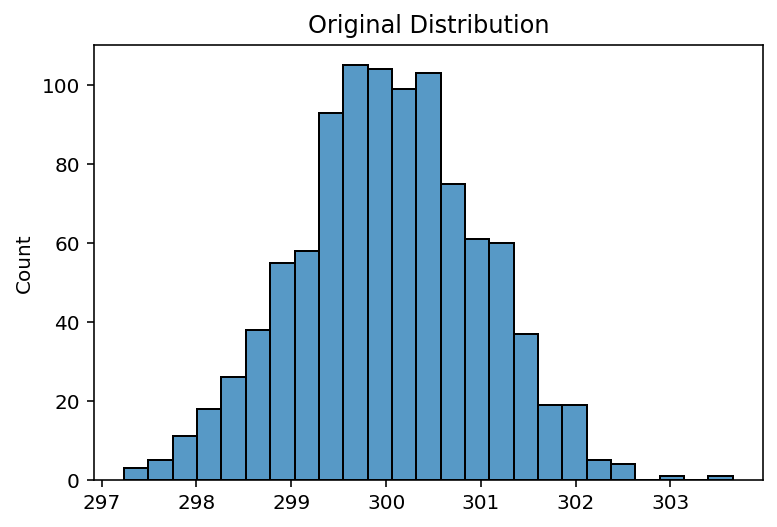

In [19]:
sns.histplot(x)
plt.title("Original Distribution")
plt.show()

#### 3. Use Bootstrap Sampling to estimate the mean
##### Let’s create 1000 samples of size 200 each to estimate the mean.

In [20]:
sample_mean = []

for i in range(1000):
    y = random.sample(x.tolist(), 200)
    avg = np.mean(y)
    sample_mean.append(avg)
print(np.mean(sample_mean))

300.02833653477416


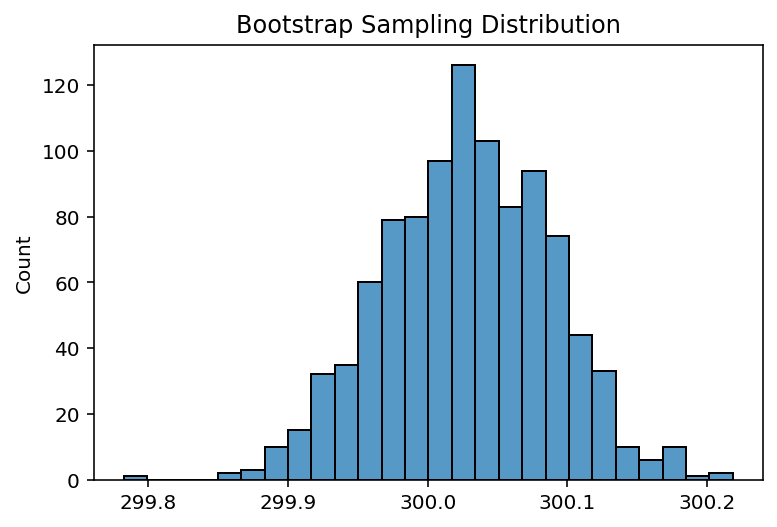

In [21]:
sns.histplot(sample_mean)
plt.title("Bootstrap Sampling Distribution")
plt.show()

## Implementation on a Diabetes Dataset
### Goal
The bootstrap can be used to <b>evaluate the performance of machine learning algorithms.</b>

The size of the sample taken each iteration may be limited to 60% or 80% of the available data. This will mean that there will be some samples that are not included in the sample. These are called out of <b>bag (OOB) samples.</b>

A model can then be <b>trained on the data sample each bootstrap iteration</b> and evaluated on the out of bag samples to give a performance statistic, which can be collected and from which confidence intervals may be calculated.

### Dataset Used:

<img src="diabetes.jpg" width="600px" height="300px"/>

1. <b>Dataset:</b> Diabetes Classification
2. <b>Features:</b> 
    1. Number of times pregnant. 
    2. Plasma glucose concentration test. 
    3. Diastolic blood pressure (mm Hg). 
    4. Triceps skinfold thickness (mm). 
    5. 2-Hour serum insulin (mu U/ml). 
    6. BMI (weight in kg/(height in m)^2). 
    7. Diabetes pedigree function. 
    8. Age (years).
    9. Class variable (0 or 1).

In [22]:
# load dataset
data = read_csv('diabetes.csv', header=None)
values = data.values

In [23]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.30)
# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    if i%100 == 0:
        print(f"Accuracy for iter {i}: {np.round(score,3)*100}%")
    stats.append(score)

Accuracy for iter 0: 72.6%
Accuracy for iter 100: 69.8%
Accuracy for iter 200: 67.80000000000001%
Accuracy for iter 300: 68.0%
Accuracy for iter 400: 66.8%
Accuracy for iter 500: 70.19999999999999%
Accuracy for iter 600: 68.7%
Accuracy for iter 700: 66.10000000000001%
Accuracy for iter 800: 68.0%
Accuracy for iter 900: 67.30000000000001%


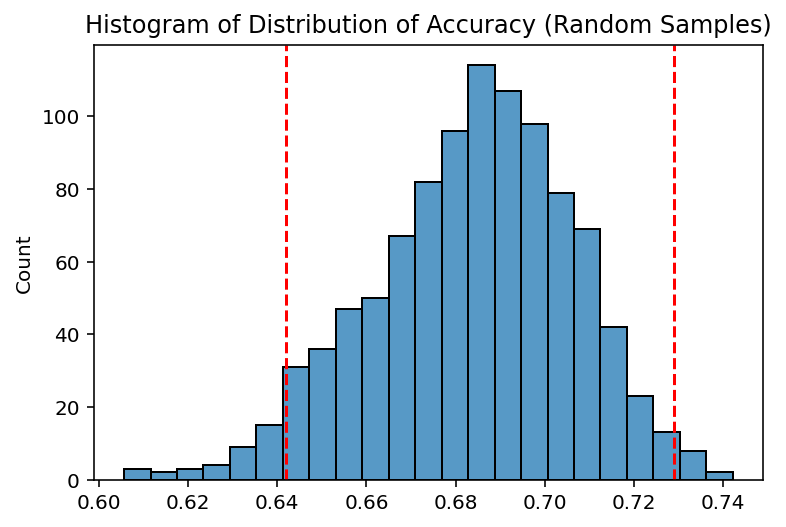

In [24]:
# plot scores
sns.histplot(stats)
plt.axvline(0.729,color='red',linestyle='dashed')
plt.axvline(0.642,color='red',linestyle='dashed')
plt.title("Histogram of Distribution of Accuracy (Random Samples)")
plt.show()

Once the <b>scores are collected</b>, a histogram is created to give an idea of the distribution of scores. We would generally expect this distribution to be Gaussian, perhaps with a skew with a symmetrical variance around the mean.

Finally, we can calculate the <b>empirical confidence intervals using the percentile() NumPy function</b>. A 95% confidence interval is used, so the values at the 2.5 and 97.5 percentiles are selected.

In [25]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%'%(alpha*100, lower*100, upper*100))

95.0 confidence interval 63.7% and 72.4%


1. <b>Finally, the confidence intervals are reported, showing that there is a 95% likelihood that the confidence interval 64.4% and 73.0% covers the true skill of the model.</b>
2. <b>This same method can be used to calculate confidence intervals of any other errors scores, such as root mean squared error for regression algorithms.</b>

### Advantages:

*   Doesn't require a large sample size.
*   Doesn’t involve any complex calculations or test statistics.
*   Doesn't need to make any assumptions about the data (such as normality)
*   Avoids the cost of repeating the experiment to get other groups of sampled data.

### Disadvantages:
*   It does not perform bias corrections, etc. If the samples are not representative of the whole population, then    bootstrap will not be very accurate.
*   May require a long amount of computation time.
*   The variation may be underestimated.

### Conclusion:
*   It’s a simple and versatile technique, we highly recommend using it.

### What next?

1. Currently, We have used the bootstrap to get an estimate of model performance.
2. In next week we will explore how the model uses the <b>bootstrap to ensemble trees</b> (Like Random Forest).